# Veress Needle Regression
# Violin plots showing error distribution of testing performance

Justin Reynolds

In [1]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import pandas as pd
import numpy as np
from time import perf_counter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import sem
import pickle
%matplotlib inline

In [2]:
testvid=8

In [3]:
arch_winner_dict={
    1:"InceptionV3", 
    2:"InceptionV3", 
    3:"InceptionV3", 
    4:"Xception", 
    5:"InceptionV3", 
    6:"InceptionV3", 
    7:"InceptionV3", 
    8:"Xception"
}

In [4]:
path2data='/home/jreynolds/projects/veress/regression/data/export_model_results/v20210812/CT_results/'
fn_X_test = 'S'+str(testvid)+'_X_test_'+str(arch_winner_dict[testvid])
fn_y_test = 'S'+str(testvid)+'_y_test_'+str(arch_winner_dict[testvid])
fn_y_preds = 'ct_S'+str(testvid)+'_y_preds_'+str(arch_winner_dict[testvid])
fn_times = 'S'+str(testvid)+'_train_and_interp_times_'+str(arch_winner_dict[testvid])
fn_trainhist = 'ct_S'+str(testvid)+'_trainhist_'+str(arch_winner_dict[testvid])
fn_testeval = 'S'+str(testvid)+'_testEval_'+str(arch_winner_dict[testvid])

In [5]:
f = open(path2data+fn_X_test, 'rb')
_X_test = pickle.load(f)
f.close()

f = open(path2data+fn_y_test, 'rb')
_y_test = pickle.load(f)
f.close()
y_test = [i for i in _y_test] # convert to list

f = open(path2data+fn_y_preds, 'rb')
_y_preds = pickle.load(f)
f.close()
y_preds = [i[0] for i in _y_preds] # convert to list

f = open(path2data+fn_times, 'rb')
_times = pickle.load(f)
f.close()

f = open(path2data+fn_trainhist, 'rb')
_trainhist = pickle.load(f)
f.close()

f = open(path2data+fn_testeval, 'rb')
_testeval = pickle.load(f)
f.close()

In [6]:
df0=pd.DataFrame(predtest_dict)
df1=df0.sort_values('y_test')
df1=df1.reset_index(drop=True)
df1['mape']=100*(abs(df1.y_test-df1.y_preds)/df1.y_test)
df1['mae']=abs(df1.y_test-df1.y_preds)
df1['bin']=pd.cut(df1["y_preds"], bins=5, labels=[0,1,2,3,4], include_lowest=True)

dfb0=df1['mape'].loc[df1['bin'] == 0]
dfb1=df1['mape'].loc[df1['bin'] == 1]
dfb2=df1['mape'].loc[df1['bin'] == 2]
dfb3=df1['mape'].loc[df1['bin'] == 3]
dfb4=df1['mape'].loc[df1['bin'] == 4]
data = [dfb0, dfb1, dfb2, dfb3, dfb4]
ticks=pd.cut(df1["y_preds"], bins=5, include_lowest=True)
unq_ticks=np.unique(ticks)
myt=["(%d, %d]"%(np.floor(i.left), np.floor(i.right)) for i in unq_ticks]

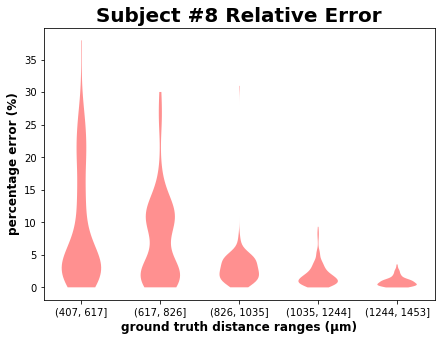

In [7]:
rrred = '#ff2222'
bluuu = '#2222ff'
fig, ax = plt.subplots(figsize=(7,5))
violin_parts = ax.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
for vp in violin_parts['bodies']:
    vp.set_facecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.5)
ax.set_title('Subject #%d Relative Error'%testvid, fontweight="bold", fontsize=20)
ax.set_ylabel('percentage error (%)', fontweight="bold", fontsize=12)
ax.set_xlabel('ground truth distance ranges (µm)', fontweight="bold", fontsize=12)
ticks=myt
ax.set_xticks(np.arange(1, len(data) + 1))
ax.set_xticklabels(ticks)
exportpath='/home/jreynolds/projects/veress/regression/code/current/export_violinplots/'
plt.savefig(exportpath+"vp_s"+str(testvid)+"_relerr.jpg", dpi=150, bbox_inches='tight')
plt.show()

# Absolute Error

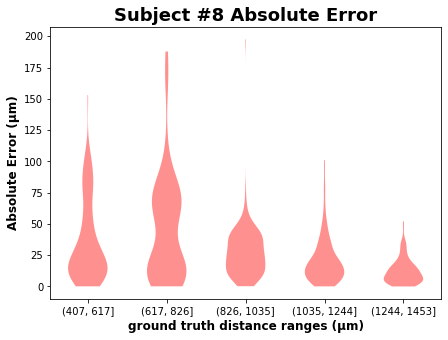

In [8]:
dfb0=df1['mae'].loc[df1['bin'] == 0]
dfb1=df1['mae'].loc[df1['bin'] == 1]
dfb2=df1['mae'].loc[df1['bin'] == 2]
dfb3=df1['mae'].loc[df1['bin'] == 3]
dfb4=df1['mae'].loc[df1['bin'] == 4]

data = [dfb0, dfb1, dfb2, dfb3, dfb4]

ticks=pd.cut(df1["y_preds"], bins=5, include_lowest=True)
unq_ticks=np.unique(ticks)

myt=["(%d, %d]"%(np.floor(unq_ticks[i].left), np.floor(unq_ticks[i].right)) for i in range(len(unq_ticks))]

fig, ax = plt.subplots(figsize=(7,5))
violin_parts = ax.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
for vp in violin_parts['bodies']:
    vp.set_facecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.5)
ax.set_title('Subject #'+str(testvid)+' Absolute Error', fontweight="bold", fontsize=18)
ax.set_ylabel('Absolute Error (µm)', fontweight="bold", fontsize=12)
ax.set_xlabel('ground truth distance ranges (µm)', fontweight="bold", fontsize=12)
ticks=myt
ax.set_xticks(np.arange(1, len(data) + 1))
ax.set_xticklabels(ticks)
exportpath='/home/jreynolds/projects/veress/regression/code/current/export_violinplots/'
plt.savefig(exportpath+"vp_s"+str(testvid)+"_"+"abserr.jpg", dpi=150, bbox_inches='tight')
plt.show()